C:\Users\bekho\AppData\Local\Temp\ipykernel_11176\2912013347.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  src_transfer = wireshark_data.groupby("Source").sum()["Length"]/1048576
C:\Users\bekho\AppData\Local\Temp\ipykernel_11176\2912013347.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dst_transfer = wireshark_data.groupby("Destination").sum()["Length"]/1048576


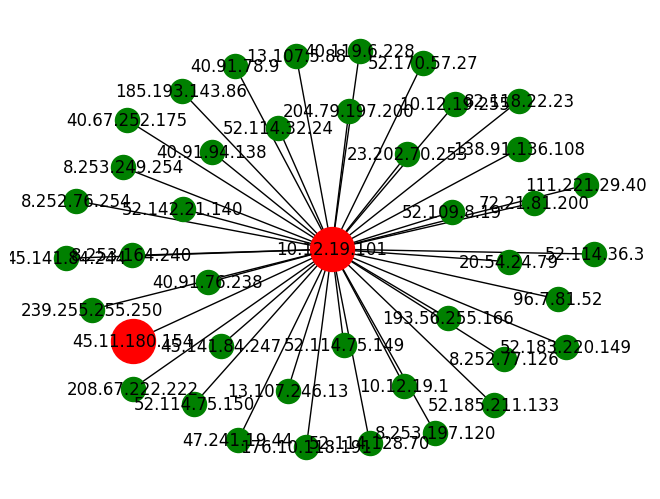

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx 
import geoip2.database
"""
References:
https://blog.networktocode.com/post/introduction-to-pandas-for-network-development/ -> Pandas basic functions
https://stackoverflow.com/questions/18062135/combining-two-series-into-a-dataframe-in-pandas -> Combining series pandas
https://medium.com/cyberdefendersprogram/python-for-cybersecurity-lesson-4-network-traffic-analysis-with-python-6321f4c9d3f7 -> Geolocation of IP
https://python.plainenglish.io/network-traffic-analysis-with-python-f95ed4e76c28 -> Draw graph
"""
wireshark_url = "data.csv"
wireshark_data = pd.read_csv(wireshark_url)
sources = wireshark_data["Source"].value_counts()
destination = wireshark_data["Destination"].value_counts()
src_count = pd.Series(sources, name = "Sources count")
dst_count = pd.Series(destination, name = "Destination count")
src_transfer = wireshark_data.groupby("Source").sum()["Length"]/1048576
dst_transfer = wireshark_data.groupby("Destination").sum()["Length"]/1048576
total_transfer = pd.Series(src_transfer + dst_transfer, name = "TotalBytes")


def IdentifySuspect(Series):
    suspect = []
    for x,y in Series.items():
            if y > 500:
                # print('IP: ', x, 'Transfer: ', y, 'MB')
                suspect.append(x)
    return suspect

def TransferSuspect(Series):
    suspect = []
    for x,y in Series.items():
            if y > 1:
                # print('IP: ', x, 'Transfer: ', y, 'MB')
                suspect.append(x)
    return suspect

src_suspect = IdentifySuspect(src_count)
dst_suspect = IdentifySuspect(dst_count)
transfer_suspect = TransferSuspect(total_transfer)
suspect = src_suspect + dst_suspect + transfer_suspect
suspect = set(suspect)

network = nx.from_pandas_edgelist(wireshark_data, source='Source' , target='Destination', edge_key='protocol')
pos = nx.spring_layout(network)
nx.draw(network, pos, node_color= "green",
    node_size = 300, with_labels = True)
options = {"node_size": 1000, "node_color":"red"}
for i in suspect:
    nx.draw_networkx_nodes(network, pos, nodelist=[i], **options)

plt.show()



